# Многоклассовая классификация и разметка голосом speech to text!

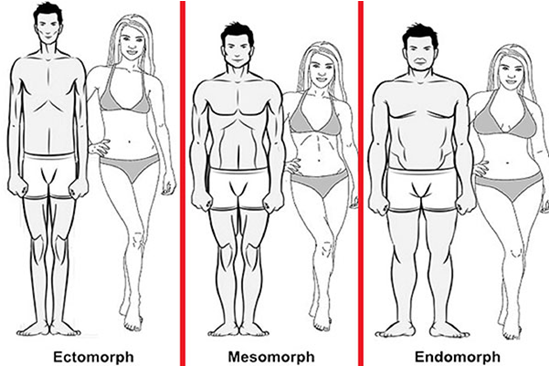

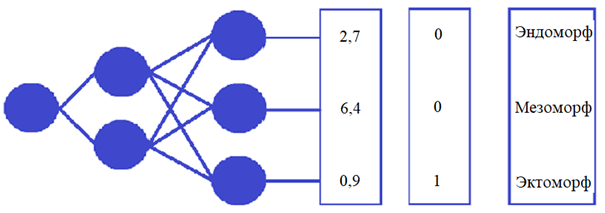

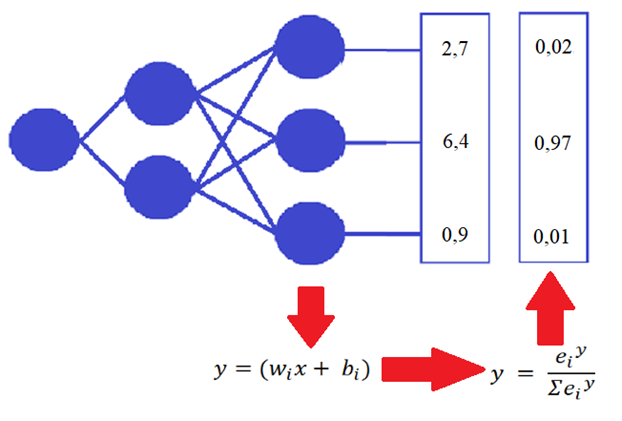

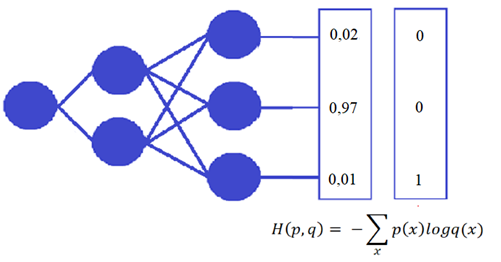


In [96]:
import torch
import numpy as np
import random


def Matrix(k, y, preds):
    global dict
    if round(float(preds[0][k])) == sf(y)[k + 1]:  dict[f"{str(int(k))}TP"] += 1
    else: dict[f"{str(int(k))}FP"] += 1
    

def sf(s_f):
    sp = []
    sp.append(s_f)
    sp.append(1) if 0.08 <= s_f < 0.12 else sp.append(0)
    sp.append(1) if 0.12 <= s_f < 0.16 else sp.append(0)
    sp.append(1) if 0.16 <= s_f < 0.2 else sp.append(0)
    return sp

def sfs(s_f):
    sp = []
    if 0.08 <= s_f < 0.12:
        sp.append(0)
    if 0.12 <= s_f < 0.16:
        sp.append(1)
    if 0.16 <= s_f < 0.2:
        sp.append(2)
    return torch.LongTensor(sp)

class BoType(torch.nn.Module):
    def __init__(self):
        super(BoType, self).__init__()
        self.fc1 = torch.nn.Linear(1, 2)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(2, 3)
        self.sm = torch.nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)

        return x.view(1, -1)

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

botype = BoType()
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(botype.parameters(), lr=5.0e-2)

for epoch in range(10000):
    optimizer.zero_grad()
    sub_fat = random.randint(8, 19) / 100
    y = sfs(sub_fat)
    sub_fat = torch.FloatTensor([sub_fat])
    preds = botype.forward(sub_fat)
    loss_val = loss(preds, y)
    loss_val.backward()
    optimizer.step()

dict = {}
for i in range(3):
    dict[f"{i}TP"] = dict[f"{i}FP"] = 0


epochs = [0.1612, 0.159, 0.1195, 0.1199, 0.1201, 0.1632, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]
for x in range(80, 200, 1):
    y = x / 1000
    k = sfs(y)
    preds = botype.inference(torch.FloatTensor([y]))
    Matrix(k, y, preds)
    
    print(f"выходное значение НС: {[round(float(r) * 100, 3)  for r in preds[0]]} => {sf(y)}. CrossEntropy => {loss(preds[0].view(1, -1), k)}")



выходное значение НС: [99.985, 0.015, 0.0] => [0.08, 1, 0, 0]. CrossEntropy => 0.5515395402908325
выходное значение НС: [99.982, 0.018, 0.0] => [0.081, 1, 0, 0]. CrossEntropy => 0.5515590906143188
выходное значение НС: [99.978, 0.022, 0.0] => [0.082, 1, 0, 0]. CrossEntropy => 0.5515831112861633
выходное значение НС: [99.974, 0.026, 0.0] => [0.083, 1, 0, 0]. CrossEntropy => 0.5516129732131958
выходное значение НС: [99.968, 0.032, 0.0] => [0.084, 1, 0, 0]. CrossEntropy => 0.5516500473022461
выходное значение НС: [99.96, 0.04, 0.0] => [0.085, 1, 0, 0]. CrossEntropy => 0.551696240901947
выходное значение НС: [99.951, 0.049, 0.0] => [0.086, 1, 0, 0]. CrossEntropy => 0.5517542958259583
выходное значение НС: [99.94, 0.06, 0.0] => [0.087, 1, 0, 0]. CrossEntropy => 0.5518272519111633
выходное значение НС: [99.925, 0.075, 0.0] => [0.088, 1, 0, 0]. CrossEntropy => 0.5519194006919861
выходное значение НС: [99.907, 0.093, 0.0] => [0.089, 1, 0, 0]. CrossEntropy => 0.5520361661911011
выходное значени

In [97]:
average = 0
for i in range(1, 4):
    print(f"{i} класс: TP = {dict[f'{str(i - 1)}TP']}, FP = {dict[f'{str(i - 1)}FP']}, precision = {dict[f'{str(i - 1)}TP'] / (dict[f'{str(i - 1)}TP'] + dict[f'{str(i - 1)}FP'])}")
    average +=  dict[f'{str(i - 1)}TP'] / (dict[f'{str(i - 1)}TP'] + dict[f'{str(i - 1)}FP'])

1 класс: TP = 35, FP = 5, precision = 0.875
2 класс: TP = 33, FP = 7, precision = 0.825
3 класс: TP = 40, FP = 0, precision = 1.0


In [99]:
print(f"Macro_average = {round(average / 3, 2)}")

Macro_average = 0.9


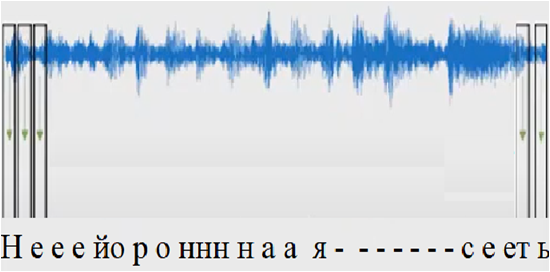

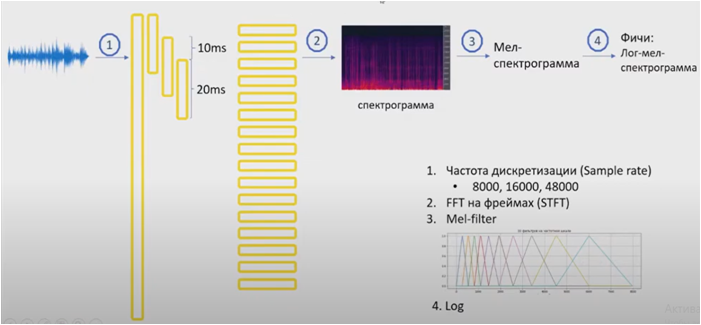

   #                     Connectionist Temporal Classification (CTC)!
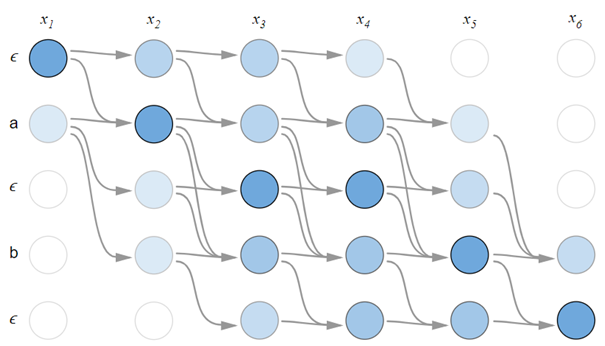

# RNN - Transducer!
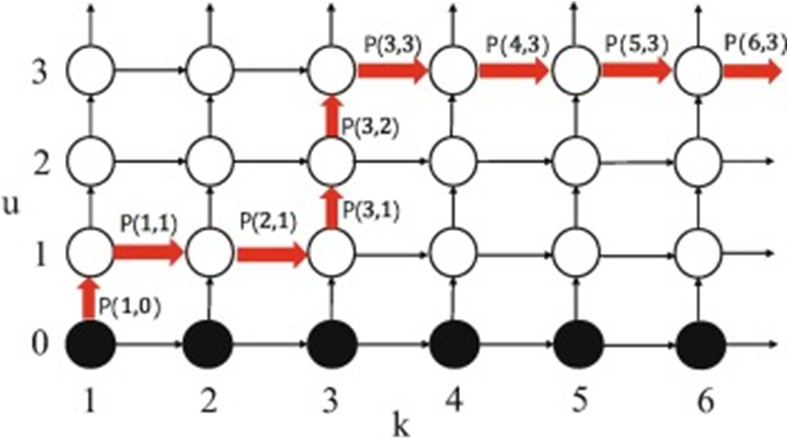

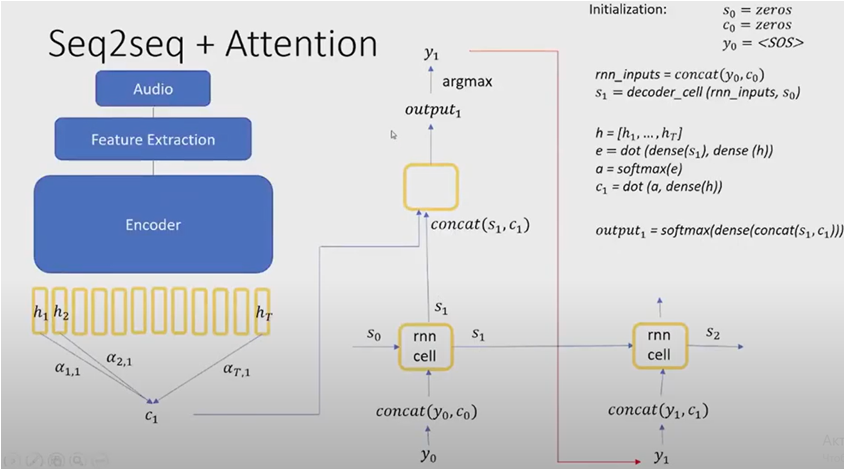

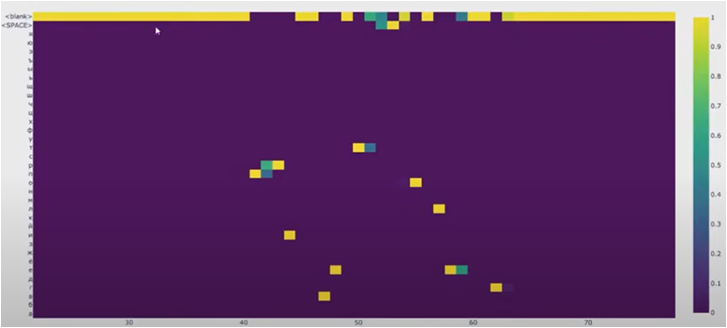

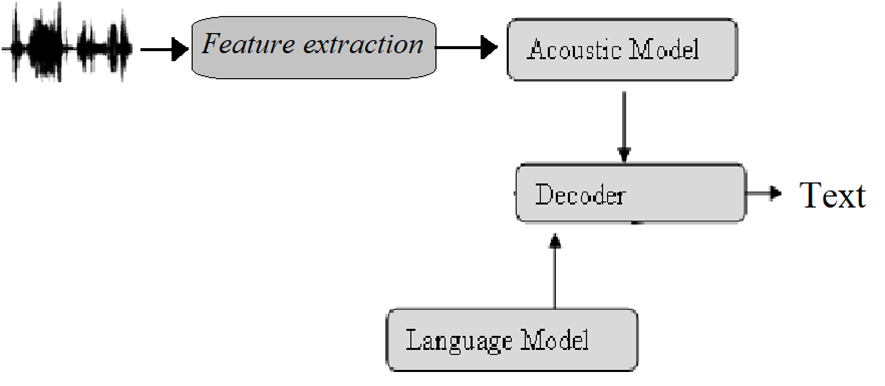

# Оценка качества текста!
# WER = (S + D + I) / N
## S – количество замен
## D – количество удалений
## I – количество вставок
## N – количество слов

# Данные для обучения!
### 1) Необходимы пары аудио-текст:
### 2) Crowdsource разметка
    Для более-менее работающей системы распознавания необходимо пару тысяч часов пар аудио-текст


In [19]:
import librosa
from os import listdir
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
def loadSound(path):
    soundList = listdir(path)
    loadedSound = []
    for sound in soundList:
        Y, sr = librosa.load(path + sound)
        loadedSound.append(librosa.feature.mfcc(Y, sr=sr))
    return np.array(loadedSound)

In [13]:
one = loadSound('./voice_123/one/')
two = loadSound('./voice_123/two/')
three = loadSound('./voice_123/three/')
X = np.concatenate((one, two, three), axis=0)
one_label = np.concatenate((np.ones(10), np.zeros(10), np.zeros(10)))
two_label = np.concatenate((np.zeros(10), np.ones(10), np.zeros(10)))
three_label = np.concatenate((np.zeros(10), np.zeros(10), np.ones(10)))
y = np.concatenate((np.repeat(0, 10), np.repeat(1, 10), np.repeat(2, 10)), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
X_train = X_train.swapaxes(1,0)
X_test = X_test.swapaxes(1,0)
X_train_torch = torch.from_numpy(X_train).float()
X_test_torch = torch.from_numpy(X_test).float()
y_train_torch = torch.from_numpy(y_train).long()
y_test_torch = torch.from_numpy(y_test).long()

In [14]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.lstm1 = nn.LSTM(input_size=87, hidden_size=256)
        self.lstm2 = nn.LSTM(input_size=256, hidden_size=128)
        self.lstm3 = nn.LSTM(input_size=128, hidden_size=64)
        self.lstm4 = nn.LSTM(input_size=64, hidden_size=32)
        self.fc1 = nn.Linear(in_features=32, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=32)
        self.fc4 = nn.Linear(in_features=32, out_features=3)

    def forward(self, x):
        x = torch.tanh(self.lstm1(x)[0])
        x = torch.tanh(self.lstm2(x)[0])
        x = torch.tanh(self.lstm3(x)[0])
        x = torch.tanh(self.lstm4(x)[0][0])
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [17]:
model = RNN()
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
for t in range(10000):
    y_pred = model(X_train_torch)
    loss = loss_fn(y_pred, y_train_torch)
    if t % 100 == 0: print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.no_grad():
        def accuracy_calc(X, y, type):
            correct = 0
            total_correct = 0
            outputs = model(X).detach().numpy()
            label = y.detach().numpy()
            for number in range(outputs.shape[0]):
                correct = np.argmax(outputs[number]) == label[number]
                total_correct += correct
            if t % 100 == 0: print(type + ' accuracy: ' + str(total_correct/outputs.shape[0] * 100) + '%')
        accuracy_calc(X_train_torch, y_train_torch, "Training")
        accuracy_calc(X_test_torch, y_test_torch, "Testing")

0 1.1107797622680664
Training accuracy: 33.33333333333333%
Testing accuracy: 33.33333333333333%
100 1.0943886041641235
Training accuracy: 33.33333333333333%
Testing accuracy: 33.33333333333333%
200 0.8421924710273743
Training accuracy: 66.66666666666666%
Testing accuracy: 66.66666666666666%
300 0.6072499752044678
Training accuracy: 66.66666666666666%
Testing accuracy: 66.66666666666666%
400 0.3141404986381531
Training accuracy: 88.88888888888889%
Testing accuracy: 66.66666666666666%
500 0.02524319477379322
Training accuracy: 100.0%
Testing accuracy: 66.66666666666666%
600 0.0056292107328772545
Training accuracy: 100.0%
Testing accuracy: 66.66666666666666%
700 0.002598384628072381
Training accuracy: 100.0%
Testing accuracy: 100.0%
800 0.001522308331914246
Training accuracy: 100.0%
Testing accuracy: 100.0%
900 0.000991191016510129
Training accuracy: 100.0%
Testing accuracy: 100.0%
1000 0.0006900489679537714
Training accuracy: 100.0%
Testing accuracy: 100.0%
1100 0.0005056658410467207
Tra